In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!curl -L -O "https://www.kaggle.com/api/v1/datasets/download/govindaramsriram/car-insurance-premium-dataset"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9606  100  9606    0     0   9426      0  0:00:01  0:00:01 --:--:--     0


In [4]:
!unzip car-insurance-premium-dataset

Archive:  car-insurance-premium-dataset
  inflating: car_insurance_premium_dataset.csv  
  inflating: car_insurance_premium_dataset_TEST.csv  


In [160]:
df = pd.read_csv('car_insurance_premium_dataset.csv')

In [161]:
df.head(100)

,Driver Age,Driver Experience,Previous Accidents,Annual Mileage (x1000 km),Car Manufacturing Year,Car Age,Insurance Premium ($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55
...,...,...,...,...,...,...,...
95,42,24,4,25,1998,27,494.35
96,24,6,3,25,1994,31,502.25
97,26,8,2,15,2021,4,496.55
98,41,23,1,13,2009,16,488.65


# Data Preparation 

In [162]:
df.isnull().sum()

Driver Age                   0
Driver Experience            0
Previous Accidents           0
Annual Mileage (x1000 km)    0
Car Manufacturing Year       0
Car Age                      0
Insurance Premium ($)        0
dtype: int64

In [163]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [164]:
df.head(100)

,driver_age,driver_experience,previous_accidents,annual_mileage_(x1000_km),car_manufacturing_year,car_age,insurance_premium_($)
0,56,32,4,17,2002,23,488.35
1,46,19,0,21,2025,0,486.15
2,32,11,4,15,2020,5,497.55
3,60,0,4,19,1991,34,498.35
4,25,7,0,13,2005,20,495.55
...,...,...,...,...,...,...,...
95,42,24,4,25,1998,27,494.35
96,24,6,3,25,1994,31,502.25
97,26,8,2,15,2021,4,496.55
98,41,23,1,13,2009,16,488.65


In [165]:
df.rename(columns={'insurance_premium_($)': 'insurance_premium'}, inplace=True)

In [166]:
df.rename(columns={'annual_mileage_(x1000_km)': 'annual_mileage'}, inplace=True)

In [167]:
df.describe().round()

,driver_age,driver_experience,previous_accidents,annual_mileage,car_manufacturing_year,car_age,insurance_premium
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,42.0,15.0,3.0,18.0,2008.0,17.0,494.0
std,14.0,11.0,2.0,4.0,10.0,10.0,6.0
min,18.0,0.0,0.0,11.0,1990.0,0.0,477.0
25%,30.0,6.0,1.0,14.0,1999.0,8.0,489.0
50%,42.0,13.0,3.0,18.0,2008.0,17.0,494.0
75%,53.0,23.0,4.0,22.0,2017.0,26.0,498.0
max,65.0,40.0,5.0,25.0,2025.0,35.0,508.0


# Data splitting

In [168]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_full_train = df_full_train.reset_index(drop=True)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [169]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [170]:
y_train = df_train.insurance_premium
y_val = df_val.insurance_premium
y_test = df_test.insurance_premium


In [171]:
del df_train["insurance_premium"]
del df_val["insurance_premium"]
del df_test["insurance_premium"]


# Training with Decision Tree

In [172]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor

train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

### Trying different values of max_depth

max_depth 1 -> rmse 4.213980
max_depth 2 -> rmse 3.464665
max_depth 3 -> rmse 2.587115
max_depth 4 -> rmse 2.260724
max_depth 5 -> rmse 2.137915
max_depth 6 -> rmse 1.798762
max_depth 7 -> rmse 1.660101
max_depth 8 -> rmse 1.615677
max_depth 9 -> rmse 1.460451
max_depth 10 -> rmse 1.550946
max_depth 11 -> rmse 1.541166
max_depth 12 -> rmse 1.548250
max_depth 13 -> rmse 1.522180
max_depth 14 -> rmse 1.559491
max_depth 15 -> rmse 1.458852
max_depth 16 -> rmse 1.458852
max_depth 17 -> rmse 1.458852
max_depth 18 -> rmse 1.458852
max_depth 19 -> rmse 1.458852
max_depth 20 -> rmse 1.458852
max_depth 21 -> rmse 1.458852
max_depth 22 -> rmse 1.458852
max_depth 23 -> rmse 1.458852
max_depth 24 -> rmse 1.458852
max_depth 25 -> rmse 1.458852
max_depth 26 -> rmse 1.458852
max_depth 27 -> rmse 1.458852
max_depth 28 -> rmse 1.458852
max_depth 29 -> rmse 1.458852
max_depth 30 -> rmse 1.458852
max_depth 31 -> rmse 1.458852
max_depth 32 -> rmse 1.458852
max_depth 33 -> rmse 1.458852
max_depth 34 -> rms

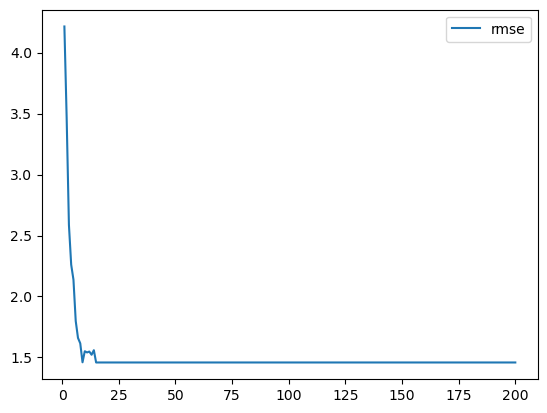

In [173]:
from sklearn.metrics import mean_squared_error
score = []
for n in range(1,201):
    regressor = DecisionTreeRegressor(max_depth=n, random_state=1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    print("max_depth %d -> rmse %f" %(n, rmse))
    score.append((n, rmse))

columns = ["max_depth", "rmse"]
df_scores = pd.DataFrame(score, columns=columns)
plt.plot(df_scores['max_depth'], df_scores['rmse'], label='rmse')
plt.legend()
plt.show()

### Trying different values of mean_samples_leaf

min_samples_leaf 1 -> rmse 1.458852
min_samples_leaf 2 -> rmse 1.484141
min_samples_leaf 3 -> rmse 1.419201
min_samples_leaf 4 -> rmse 1.439663
min_samples_leaf 5 -> rmse 1.551828
min_samples_leaf 6 -> rmse 1.637512
min_samples_leaf 7 -> rmse 1.728705
min_samples_leaf 8 -> rmse 1.751773
min_samples_leaf 9 -> rmse 1.770538
min_samples_leaf 10 -> rmse 1.832381
min_samples_leaf 11 -> rmse 1.848446
min_samples_leaf 12 -> rmse 1.817562
min_samples_leaf 13 -> rmse 1.881961
min_samples_leaf 14 -> rmse 2.000005
min_samples_leaf 15 -> rmse 2.019352
min_samples_leaf 16 -> rmse 2.046199
min_samples_leaf 17 -> rmse 2.094148
min_samples_leaf 18 -> rmse 2.094148
min_samples_leaf 19 -> rmse 2.129912


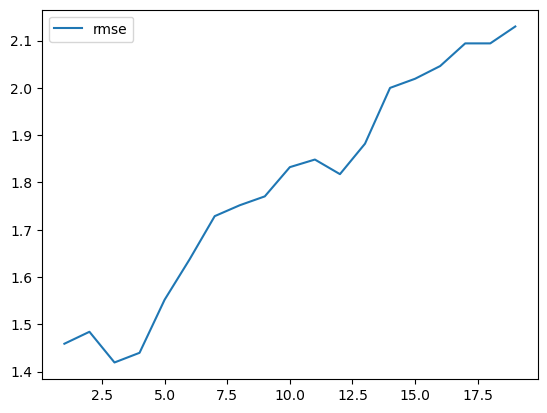

In [174]:
score = []

for s in range(1,20):
    regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=s, random_state=1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    print("min_samples_leaf %d -> rmse %f" %(s, rmse))
    score.append((s, rmse))
columns = ["min_samples_leaf", "rmse"]
df_scores = pd.DataFrame(score, columns=columns)
plt.plot(df_scores['min_samples_leaf'], df_scores['rmse'], label='rmse')
plt.legend()
plt.show()

### Train Decision Tree with tuned parameters

In [175]:
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=3, random_state=1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(1.4192012449300906)

# Training with Random Forest

### Trying different values of n_estimators

10 -> 1.179000
20 -> 1.012000
30 -> 0.961000
40 -> 0.930000
50 -> 0.912000
60 -> 0.908000
70 -> 0.908000
80 -> 0.899000
90 -> 0.892000
100 -> 0.895000
110 -> 0.875000
120 -> 0.867000
130 -> 0.863000
140 -> 0.861000
150 -> 0.856000
160 -> 0.864000
170 -> 0.864000
180 -> 0.858000
190 -> 0.868000
200 -> 0.863000


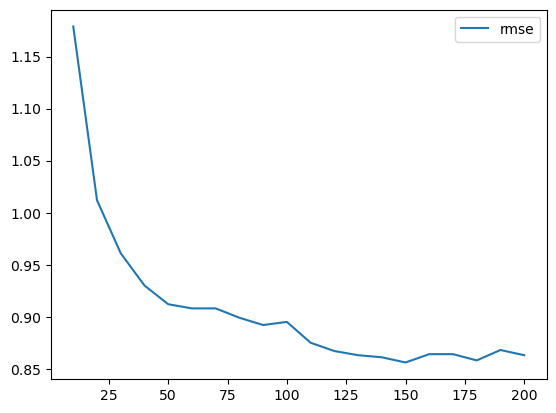

In [176]:
from sklearn.ensemble import RandomForestRegressor

scores = []

for n in range(10,201,10):
    rf_regressor = RandomForestRegressor(n_estimators=n, n_jobs=-1, random_state=1)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.round(mean_squared_error(y_val, y_pred),3)
    print("%d -> %f"%(n, rmse))
    scores.append((n,  rmse))

columns = ['estimators', 'rmse']
df_results = pd.DataFrame(scores, columns=columns)
plt.plot(df_results['estimators'], df_results['rmse'], label='rmse')
plt.legend()
plt.show()

### Trying different values of max_depth

1  -> 14.944000
2  -> 10.416000
3  -> 5.138000
4  -> 3.344000
5  -> 2.203000
6  -> 1.482000
7  -> 1.127000
8  -> 0.961000
9  -> 0.894000
10  -> 0.856000
11  -> 0.865000
12  -> 0.856000
13  -> 0.855000
14  -> 0.856000
15  -> 0.858000
16  -> 0.851000
17  -> 0.857000
18  -> 0.857000
19  -> 0.856000


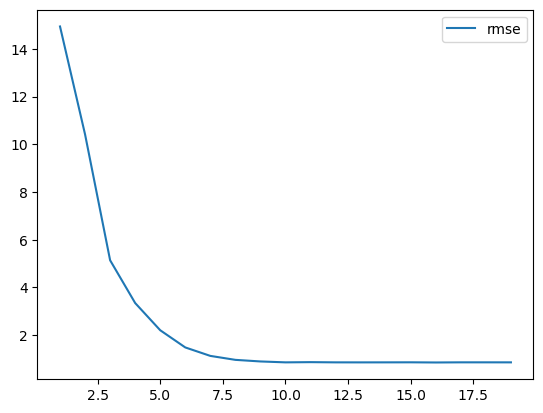

In [177]:
from sklearn.ensemble import RandomForestRegressor

scores = []
for d in range(1,20):
    rf_regressor = RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=1, max_depth=d)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.round(mean_squared_error(y_val, y_pred),3)
    print("%d  -> %f"%(d, rmse))
    scores.append((d, rmse))

columns = ['max_depth', 'rmse']
df_results = pd.DataFrame(scores, columns=columns)
plt.plot(df_results['max_depth'], df_results['rmse'], label='rmse')
plt.legend()
plt.show()

In [178]:
rf_regressor = RandomForestRegressor(n_estimators=150, n_jobs=-1, random_state=1, max_depth=10)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.round(mean_squared_error(y_val, y_pred),3)
rmse

np.float64(0.856)

# Training using XGBoost

### Training model with eta 0.3

In [179]:
import xgboost as xgb
output = []
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [180]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [181]:
%%capture output
df_score = []
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


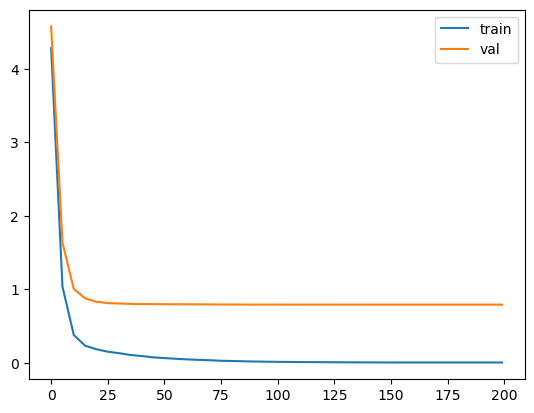

,num_iter,train_rmse,val_rmse
0,0,4.27839,4.57414
1,5,1.03461,1.63273
2,10,0.37618,1.00303
3,15,0.23126,0.87572
4,20,0.18278,0.82980
5,25,0.14956,0.81014
6,30,0.12939,0.80582
7,35,0.10479,0.79979
8,40,0.09014,0.79731
9,45,0.07280,0.79765


In [182]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score['train_rmse'], label='train')
plt.plot(df_score.num_iter, df_score['val_rmse'], label='val')
plt.legend()
plt.show()
df_score

### Training model with eta 0.5

In [183]:
xgb_params = {
    'eta': 0.5, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [184]:
%%capture output
df_score = []
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
df_score = parse_xgb_output(output)


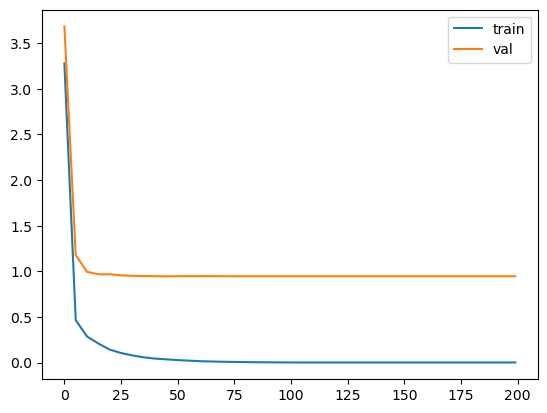

,num_iter,train_rmse,val_rmse
0,0,3.27766,3.68210
1,5,0.46508,1.17798
2,10,0.28639,0.99508
3,15,0.20936,0.96741
4,20,0.14343,0.96777
5,25,0.10523,0.95662
6,30,0.07959,0.95109
7,35,0.05828,0.94852
8,40,0.04437,0.94714
9,45,0.03616,0.94505


In [185]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score['train_rmse'], label='train')
plt.plot(df_score.num_iter, df_score['val_rmse'], label='val')
plt.legend()
plt.show()
df_score

### Training with multiple values of eta

In [186]:

for e in [0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    xgb_params = {
        'eta': e, 
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    scores.append(rmse)
    print("eta %f -> rmse %f " % (e, rmse))

eta 0.100000 -> rmse 0.766635 
eta 0.200000 -> rmse 0.784380 
eta 0.300000 -> rmse 0.790533 
eta 0.400000 -> rmse 0.906131 
eta 0.500000 -> rmse 0.946175 
eta 0.600000 -> rmse 1.001050 
eta 0.700000 -> rmse 1.137727 
eta 0.800000 -> rmse 1.288856 
eta 0.900000 -> rmse 1.429443 


### Training with different max_depth

In [187]:
for d in range(1,200):
    xgb_params = {
        'eta': 0.2, 
        'min_child_weight': 1,
        'max_depth': d,
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    scores.append(rmse)
    print("max_depth %f -> rmse %f " % (d, rmse))



max_depth 1.000000 -> rmse 0.506416 
max_depth 2.000000 -> rmse 0.478887 
max_depth 3.000000 -> rmse 0.495418 
max_depth 4.000000 -> rmse 0.626433 
max_depth 5.000000 -> rmse 0.711971 
max_depth 6.000000 -> rmse 0.784380 
max_depth 7.000000 -> rmse 0.830475 
max_depth 8.000000 -> rmse 0.892371 
max_depth 9.000000 -> rmse 0.854183 
max_depth 10.000000 -> rmse 0.880356 
max_depth 11.000000 -> rmse 0.880099 
max_depth 12.000000 -> rmse 0.896227 
max_depth 13.000000 -> rmse 0.921984 
max_depth 14.000000 -> rmse 0.923821 
max_depth 15.000000 -> rmse 0.922714 
max_depth 16.000000 -> rmse 0.924075 
max_depth 17.000000 -> rmse 0.923803 
max_depth 18.000000 -> rmse 0.923718 
max_depth 19.000000 -> rmse 0.923702 
max_depth 20.000000 -> rmse 0.923825 
max_depth 21.000000 -> rmse 0.923825 
max_depth 22.000000 -> rmse 0.923825 
max_depth 23.000000 -> rmse 0.923825 
max_depth 24.000000 -> rmse 0.923825 
max_depth 25.000000 -> rmse 0.923825 
max_depth 26.000000 -> rmse 0.923825 
max_depth 27.000000 -

### Training with different values of gamma

In [188]:
scores = []
for g in range(1,20):
    xgb_params = {
        'eta': 0.2, 
        'gamma': g,
        'min_child_weight': 1,
        'max_depth': 2,
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    scores.append(rmse)
    print("gamma %f -> rmse %f " % (g, rmse))

gamma 1.000000 -> rmse 0.575548 
gamma 2.000000 -> rmse 0.619609 
gamma 3.000000 -> rmse 0.658467 
gamma 4.000000 -> rmse 0.674987 
gamma 5.000000 -> rmse 0.697942 
gamma 6.000000 -> rmse 0.721412 
gamma 7.000000 -> rmse 0.730546 
gamma 8.000000 -> rmse 0.756939 
gamma 9.000000 -> rmse 0.775329 
gamma 10.000000 -> rmse 0.769276 
gamma 11.000000 -> rmse 0.784585 
gamma 12.000000 -> rmse 0.786810 
gamma 13.000000 -> rmse 0.808699 
gamma 14.000000 -> rmse 0.829172 
gamma 15.000000 -> rmse 0.851275 
gamma 16.000000 -> rmse 0.852969 
gamma 17.000000 -> rmse 0.883579 
gamma 18.000000 -> rmse 0.888508 
gamma 19.000000 -> rmse 0.883557 


### Training with different values of min_child_weight

In [189]:
scores = []
for c in range(1,200,10):
    xgb_params = {
        'eta': 0.2, 
        'min_child_weight': c,
        'max_depth': 2,
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    scores.append(rmse)
    print("min_child_weight %f -> rmse %f " % (c, rmse))

min_child_weight 1.000000 -> rmse 0.478887 
min_child_weight 11.000000 -> rmse 0.491233 
min_child_weight 21.000000 -> rmse 0.512598 
min_child_weight 31.000000 -> rmse 0.538765 
min_child_weight 41.000000 -> rmse 0.535673 
min_child_weight 51.000000 -> rmse 0.548540 
min_child_weight 61.000000 -> rmse 0.589125 
min_child_weight 71.000000 -> rmse 0.640243 
min_child_weight 81.000000 -> rmse 0.680172 
min_child_weight 91.000000 -> rmse 0.762448 
min_child_weight 101.000000 -> rmse 1.045873 
min_child_weight 111.000000 -> rmse 1.108588 
min_child_weight 121.000000 -> rmse 1.118018 
min_child_weight 131.000000 -> rmse 1.222078 
min_child_weight 141.000000 -> rmse 1.248251 
min_child_weight 151.000000 -> rmse 1.401804 
min_child_weight 161.000000 -> rmse 1.426699 
min_child_weight 171.000000 -> rmse 1.577703 
min_child_weight 181.000000 -> rmse 1.612899 
min_child_weight 191.000000 -> rmse 1.690916 


### Training with different values of max_delta_step

In [190]:
scores = []
for s in range(0,10):
    xgb_params = {
        'eta': 0.2, 
        'min_child_weight': 1,
        'max_depth': 2,
        'max_delta_step': s,
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval)
    
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    scores.append(rmse)
    print("max_delta_step %f -> rmse %f " % (s, rmse))

max_delta_step 0.000000 -> rmse 0.478887 
max_delta_step 1.000000 -> rmse 0.669336 
max_delta_step 2.000000 -> rmse 0.474330 
max_delta_step 3.000000 -> rmse 0.469453 
max_delta_step 4.000000 -> rmse 0.482642 
max_delta_step 5.000000 -> rmse 0.526383 
max_delta_step 6.000000 -> rmse 0.554667 
max_delta_step 7.000000 -> rmse 0.478887 
max_delta_step 8.000000 -> rmse 0.478887 
max_delta_step 9.000000 -> rmse 0.478887 


### Training with tuned parameters

In [191]:
xgb_params = {
    'eta': 0.2, 
    'max_depth': 2,
    'min_child_weight': 1,
    'max_delta_step': 2,
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [192]:
%%capture output
df_score = []
model = xgb.train(xgb_params, dtrain, num_boost_round=600,
                  verbose_eval=5,
                  evals=watchlist)
df_score = parse_xgb_output(output)


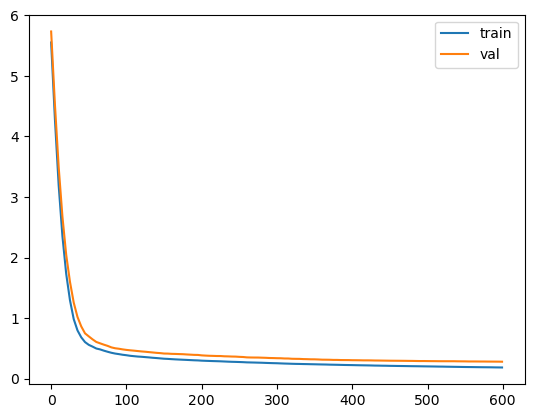

,num_iter,train_rmse,val_rmse
0,0,5.55158,5.73319
1,5,4.28693,4.53206
2,10,3.19167,3.49602
3,15,2.35139,2.67408
4,20,1.73168,2.04516
...,...,...,...
116,580,0.18790,0.28202
117,585,0.18721,0.28169
118,590,0.18598,0.28127
119,595,0.18522,0.28065


In [193]:
df_score = parse_xgb_output(output)
plt.plot(df_score.num_iter, df_score['train_rmse'], label='train')
plt.plot(df_score.num_iter, df_score['val_rmse'], label='val')
plt.legend()
plt.show()
df_score

# Choosing model

<span style="color:red">Decision tree -> rmse **1.4192012449300906**</span><br>
<span style="color:red">Random forest -> rmse **0.856**</span><br>
<span style="color:green">Xboost -> rmse **0.27974**</span>

In [194]:
!pip install tqdm

# KFold verification on XGBoost

In [195]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
n_splits = 5


kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train_k = df_full_train.iloc[train_idx].copy()
    df_val_k = df_full_train.iloc[val_idx].copy()

    y_train_k = df_train_k.insurance_premium
    y_val_k = df_val_k.insurance_premium

    del df_train_k["insurance_premium"]
    del df_val_k["insurance_premium"]
    
    train_dicts_k = df_train_k.to_dict(orient='records')
    val_dicts_k = df_val_k.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train_k = dv.fit_transform(train_dicts_k)
    features = list(dv.get_feature_names_out())
    X_val_k = dv.transform(val_dicts_k)
    dtrain_k = xgb.DMatrix(X_train_k, label=y_train_k, feature_names=features)
    dval_k = xgb.DMatrix(X_val_k, label=y_val_k, feature_names=features)
    watchlist = [(dtrain_k, 'train'), (dval_k, 'val')]

    xgb_params = {
        'eta': 0.2, 
        'max_depth': 2,
        'min_child_weight': 1,
        'max_delta_step': 2,
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    model = xgb.train(xgb_params, dtrain_k, num_boost_round=600,
                      verbose_eval=5,
                     )
    y_pred = model.predict(dval_k)

    mse = mean_squared_error(y_val_k, y_pred)
    rmse = np.sqrt(mse)
    scores.append(rmse)
    print("rmse - > %f " % (rmse))



rmse - > 0.355398 
rmse - > 0.282227 
rmse - > 0.360185 
rmse - > 0.308510 
rmse - > 0.299035 


# Train final model with df_full_train and validate with test df_test

In [196]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

df_final_train = pd.concat([df_train, df_val],ignore_index=True)
y_final_train = pd.concat([y_train, y_val],ignore_index=True)
train_dicts = df_final_train.to_dict(orient='records')
test_dicts = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
features = list(dv.get_feature_names_out())
X_test = dv.transform(test_dicts)



dtrain = xgb.DMatrix(X_train, label=y_final_train, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)


xgb_params = {
    'eta': 0.2, 
    'min_child_weight': 1,
    'max_depth': 2,
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=600,
                  verbose_eval=5,
                 )
y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.251782242302518)

# Saving Model

In [197]:
import pickle 

with open('Insurance-premium-prediction-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)

print('Insurance-premium-prediction-model.bin')

Insurance-premium-prediction-model.bin


# Testing api deployed to elasticbeanstalk in AWS

In [207]:
import requests
url = "http://insurance-premium-predictor-env.eba-qktrejxq.us-east-1.elasticbeanstalk.com/predict_premium"
client = {
        "driver_age": 30,
        "driver_experience": 5,
        "previous_accidents": 2,
        "annual_mileage": 15,
        "car_manufacturing_year": 2020,
        "car_age": 5
      }
requests.post(url, json=client).json()

{'insurance_premium_prediction': 496.6302185058594}